### В рамках формулировки задачи и сэмпла данных, модель ниже имеет 100% точность предсказаний, так как таргет (strength) является функцией от длины пароля (password)

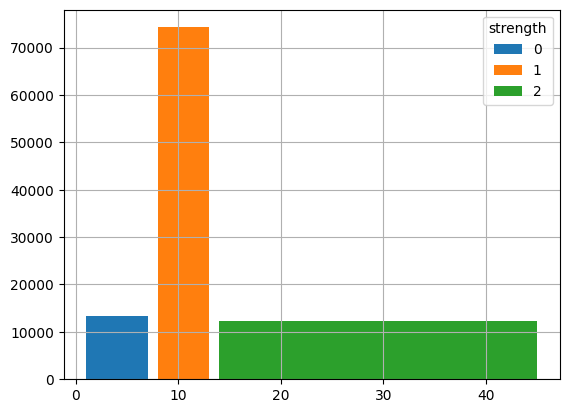

In [30]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('passwords.csv', sep=',')
df['len'] = df['password'].apply(lambda x: len(x))

df.groupby('strength')['len'].hist(bins=1)
plt.legend([0, 1, 2], title='strength')

### Явно видна зависимость распределения оценки пароля от его длины.
### Поэтому для решения задачи достаточно функции ниже.

In [31]:
def get_strength(password: str) -> int:
    if len(password) <= 7:
        return 0
    if 7 < len(password) < 14:
        return 1
    return 2

In [32]:
# accuracy_score: доля правильно классифицированных паролей
# f1_score: Среднее гармоническое между точностью и полнотой

from sklearn.metrics import accuracy_score, f1_score
df = pd.read_csv('passwords.csv', sep=',')

print('Результаты функции от длины:')
print(f"Точность функции: {accuracy_score(df['strength'], df['password'].apply(get_strength))}")
print(f"F1-мера: {f1_score(df['strength'], df['password'].apply(get_strength), average='weighted')}")

metric_result = {}
metric_result['len_function'] = {
    'accuracy_score': accuracy_score(df['strength'], df['password'].apply(get_strength)),
    'f1_score': f1_score(df['strength'], df['password'].apply(get_strength), average='weighted')
}

Результаты функции от длины:
Точность функции: 1.0
F1-мера: 1.0


In [33]:
# проверка нового пароля
get_strength('your password')

1

### Комментарий к решению:
#### В рамках анализа данных удалось выделить следующие фичи:
* len - длина пароля
* any_num - флаг наличия цифр
* num_count - количество цифр
* any_capital - флаг наличия заглавных букв
* capital_cnt - количество заглавных букв
* any_symbols - флаг других символов
* any_symbols_cnt - количество других символов
* uniq_metric - доля уникальных символов относительно длины пароля
* all_uniq - флаг уникальности всех символов
* max_repeat_perc - доля самого повторяющегося символа относительно длины пароля
* not_safety - вхождение в списки "слитых" паролей

#### Однако, в этом мало смысла, так как, например, бустингу, независимо от количества разных фичей, будет достаточно длины пароля для accuracy_score = 1